# Precipitation Events Effect on Nutrient Fluxes

@author = Madison Quill

@date = 2023-3-23

@license = MIT -- https://opensource.org/licenses/MIT

## Introduction

Understanding under what conditions large nutrient fluxes occur in can help you to understand what might be the best practices for managing nutrient fluxes in a watershed. If nutrient fluxes are higher during storm conditions, stormwater management practices could be implemented in a watershed to lower nutrient fluxes. 

## Specific Hypothesis or Research Question

Do annual fluxes of total dissolved nitrogen in streamflow occur more during baseflow or stormflow in a non-urbanized watershed? Is it just precipitation in the moment or is it buffering and changing the water as it goes through the watershed?

## Study Sites

Hubbard Brook NH, Watershed 6. This is the biogeochemical reference watershed and so likely would not have human interference effecting the biogeochemical properties taking that variable out of the equation.

## Describe Data Sets

Daily Streamflow Dataset has daily streamflow measurements in mm/day for 9 different watersheds in Hubbard Brook from 1956-01-01 to 2022-07-07

Daily Watershed Precipitation Dataset has daily precipitation in each watershed in mm/day for different watersheds in Hubbard Brook from 1956-01-02 to 2022-09-15

W6 Instantaneous Streamflow Dataset shows stream discharge in cubic feet per second and liters per second for Watershed 6 over less than daily intervals from 1963-01-01 to 2013-01-01

Weekly Stream Chemistry Dataset shows concentrations of different nutrients in the stream in mg/L in a watershed measured weekly from 1963-06-01 to 2021-05-24


# Parameters

watershed_area - The area of the watershed in mi^2

short_period - the period that will be used to show how long precipitation effects discharge.

precip_days - the amount of previous days of precipitation data that affects the discharge



In [39]:
#Specify Parameters

import os
import pandas as pd
from datetime import datetime
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np

watershed_area = 0.051

short_period = ['2009-07-01','2009-07-10']


## Load and Plot Raw Data
Following code loads raw data from each dataset for watershed 6 and plots a raw data time series for each of the data sets.

C:\Users\Owner\AppData\Local\Temp\ipykernel_21300\2878994741.py:67: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  streamchem = pd.read_csv(infile_names[4], parse_dates = ['date'],


KeyError: 'TDN'

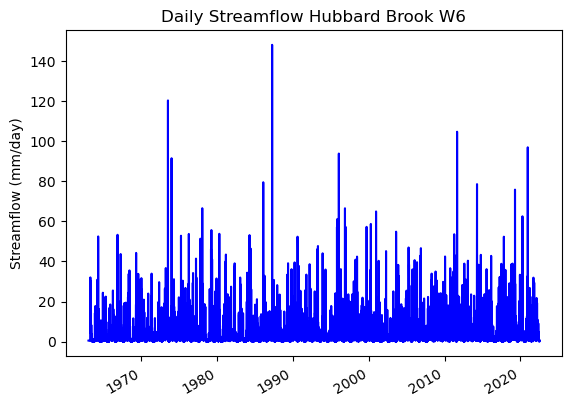

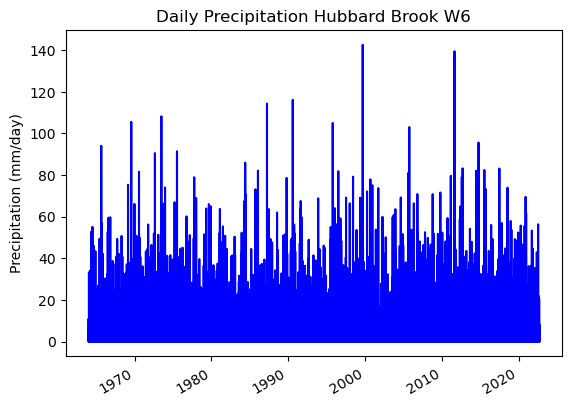

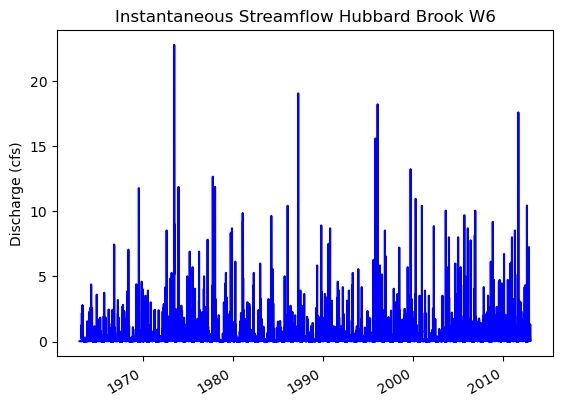

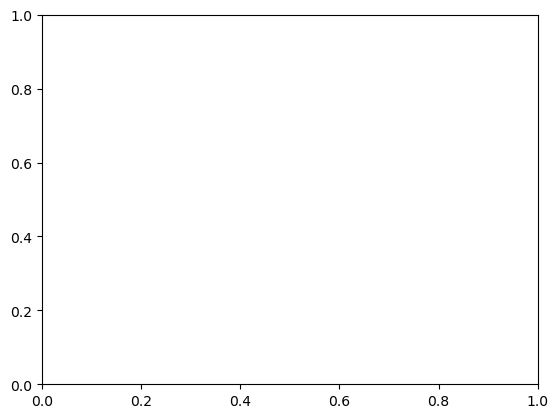

In [32]:
#Load and Provide initial Plot of Raw Data

#Create list of file names
infile_names = ['Daily_Streamflow.csv','Daily_Watershed_Precipitation.csv','W6_Inst_Streamflow.csv','Weekly_Precip_Chemistry.csv','Weekly_Stream_Chemistry.csv']

#Read in Daily streamflow data
dayflow = pd.read_csv(infile_names[0], parse_dates = ['DATE'],
                 index_col=['DATE'])

#Locate and trim to watershed 6
dayflow = dayflow.loc[(dayflow['WS'] == 6)]

#Create Daily Streamflow plot
fig, ax = plt.subplots()

# Plot daily streamflow
ax.plot(dayflow['Streamflow'],  'b-')

# Add plot components 
ax.set_ylabel('Streamflow (mm/day)')          
ax.set_title('Daily Streamflow Hubbard Brook W6') 
  
# command to make x-tick labels diagonal to avoid overlap
fig.autofmt_xdate() 

#Read in Daily Precipitation data
dayprecip = pd.read_csv(infile_names[1], parse_dates = ['DATE'],
                 index_col=['DATE'])

#Locate and trim to watershed 6
dayprecip = dayprecip.loc[(dayprecip['watershed'] == 'W6')]

#Create daily precipitation plot
fig, ax = plt.subplots()

# Plot daily precipitation
ax.plot(dayprecip['Precip'],  'b-')

# Add plot components 
ax.set_ylabel('Precipitation (mm/day)')          
ax.set_title('Daily Precipitation Hubbard Brook W6') 
  
# command to make x-tick labels diagonal to avoid overlap
fig.autofmt_xdate() 

#Read in Instant Streamflow data
instflow = pd.read_csv(infile_names[2], parse_dates = ['DATETIME'],
                 index_col=['DATETIME'])

#Create Instantaneous Streamflow data plot
fig, ax = plt.subplots()

# Plot instantaneous streamflow data
ax.plot(instflow['Discharge_cfs'],  'b-')

# Add plot components 
ax.set_ylabel('Discharge (cfs)')          
ax.set_title('Instantaneous Streamflow Hubbard Brook W6') 
  
# command to make x-tick labels diagonal to avoid overlap
fig.autofmt_xdate() 

#Read in weekly stream chemistry data
streamchem = pd.read_csv(infile_names[4], parse_dates = ['date'],
                 index_col=['date'])

#Locate and trim to watershed 6 data
streamchem = streamchem.loc[(streamchem['site'] == 'W6')]

#Cut out extraneous information
streamchem = streamchem['TDN']

#Create TDN plot
fig, ax = plt.subplots()

# Plot TDN concentration
ax.plot(streamchem['TDN'],  'b-')

# Add plot components 
ax.set_ylabel('Total Dissolved Nitrogen Concentration (mg/L)')          
ax.set_title('Weekly Stream Chemistry Hubbard Brook W6') 
  
# command to make x-tick labels diagonal to avoid overlap
fig.autofmt_xdate() 


## Additional Steps To take
1. Plot a summer month of discharge that has precipitation to see how long precipitation affects discharge.
2. Add discharge and precipitation data that affects the day of chemistry sampling
3. Convert Discharge to l/s and calculate nutrient flux using discharge and concentration
5. Plot Q-c scatterplot graph with TDN concentrations with line of best fit and correlation for the data.
6. Plot Time plot of daily precipitation and nutrient fluxes
7. Remove months affected by snowmelt and plot precipitation amount versus TDN nutrient flux scatterplot with line of best fit and correlation


Plot a summer month of discharge that has precipitation to see how long precipitation affects discharge.

In [ ]:
#Plot a summer month of discharge that has precipitation to see how long precipitation affects discharge.
qplot = instflow[short_period[0]:short_period[1]]

#Create Instantaneous Streamflow data plot
fig, ax = plt.subplots()

# Plot instantaneous streamflow data
ax.plot(qplot['Discharge_cfs'],  'b-')

# Add plot components 
ax.set_ylabel('Discharge (cfs)')          
ax.set_title('Instantaneous Streamflow Hubbard Brook W6') 
  
# command to make x-tick labels diagonal to avoid overlap
fig.autofmt_xdate() 

Seems as if precipitation generally goes through the watershed within a day so the precipitation that occurs on the day is likely enough.

Add discharge and precipitation data that affects the day of chemistry sampling

In [37]:
#Add discharge and precipitation data that affects the day of chemistry sampling

#Merge data sets
data = pd.merge(streamchem,dayprecip,left_index = True, right_index = True)
data = pd.merge(data,dayflow,left_index = True, right_index = True)

#Drop nan values for analysis
data = data.dropna()



               TDN watershed  Precip  WS  Streamflow  Flag
2013-01-07  0.0979        W6     1.3   6       0.975  0.00
2013-01-14  0.1599        W6     1.9   6       6.586  0.00
2013-01-22  0.1284        W6     1.4   6       1.415  1.00
2013-01-28  0.1067        W6     5.3   6       0.224  0.48
2013-01-31  0.3989        W6    40.9   6      40.394  0.75
...            ...       ...     ...  ..         ...   ...
2021-04-30  0.1397        W6    36.2   6      22.394  0.00
2021-05-03  0.1385        W6     0.0   6       3.276  0.00
2021-05-10  0.0615        W6     0.6   6       1.676  0.00
2021-05-17  0.0655        W6     0.0   6       0.824  0.00
2021-05-24  0.0659        W6     0.0   6       0.285  0.00

[654 rows x 6 columns]


Convert Discharge to l/s and calculate nutrient flux using discharge and concentration. 
    
    Calc 1. Discharge = Streamflow * Watershed Area
    Calc 2. Nutrient Flux = Discharge * Concentration

In [38]:
#Convert Discharge to l/s and calculate nutrient flux using discharge and concentration

#Convert discharge to l/s
data['Discharge'] = data["Streamflow"]*watershed_area *(5280*5280) * (1/10.76)*(1/1000)*(1/86400) * 24.5 * (1/86400)

#Calculate nutrient flux
data['flux'] = data['Discharge']*data['TDN']



               TDN watershed  Precip  WS  Streamflow  Flag     Discharge  \
2013-01-07  0.0979        W6     1.3   6       0.975  0.00  4.228331e-07   
2013-01-14  0.1599        W6     1.9   6       6.586  0.00  2.856183e-06   
2013-01-22  0.1284        W6     1.4   6       1.415  1.00  6.136501e-07   
2013-01-28  0.1067        W6     5.3   6       0.224  0.48  9.714319e-08   
2013-01-31  0.3989        W6    40.9   6      40.394  0.75  1.751787e-05   
...            ...       ...     ...  ..         ...   ...           ...   
2021-04-30  0.1397        W6    36.2   6      22.394  0.00  9.711717e-06   
2021-05-03  0.1385        W6     0.0   6       3.276  0.00  1.420719e-06   
2021-05-10  0.0615        W6     0.6   6       1.676  0.00  7.268392e-07   
2021-05-17  0.0655        W6     0.0   6       0.824  0.00  3.573482e-07   
2021-05-24  0.0659        W6     0.0   6       0.285  0.00  1.235974e-07   

                    flux  
2013-01-07  4.139536e-08  
2013-01-14  4.567037e-07  
2013-0

Create scatterplot function

In [42]:
#Create Function
def regressplot(x_var,data_series, y_label,x_label, figtitle):
    """ Description
    Creates a scatterplot showing an independent variable and dependent variable, plots
    the best-fit line using linear techniques,
    calculates and returns, displayed on a figure, a confidence interval for 
    the regression slope, plus the p-value.
    
    Parameters
    ----------
    x_var : array or series
        Independent variable to plot on x-axis
    data_series : array or series
        Dependent variable to plot on y-axis with the same length as x    
    x_label : string
        Text to use as x-label on plot
    y_label : string
        Text to use as y-label on plot
    figtitle: string
        Title of Figure
    """
    

    #Calculate parametric linear regression values
    lsq_coeff = stats.linregress(x_var,data_series)

    #Create Plot
    fig, ax = plt.subplots()
    
    #Create Plot showing time series of input data series
    ax.plot(x_var,data_series, 'k.')
    
    #Plot parametric best fit line
    ax.plot(x_var, lsq_coeff.intercept + lsq_coeff.slope *
           x_var, 'b-', label='Linear regression')

    #Annotation Placement
    xx = ax.get_xlim()
    yy = ax.get_ylim()

    #Display least squares slope on graph
    ax.annotate(f'Least-squares slope = {lsq_coeff.slope:.6f} +/- {2*lsq_coeff.stderr:.6f}',
                xy=(xx[1]-0.05*(xx[1]-xx[0]), yy[0] + 0.18*(yy[1]-yy[0])),
                horizontalalignment='right')

    #Display least squares correlation on graph
    ax.annotate(f'Least-squares correlation = {lsq_coeff.rvalue:.3f}; p = {lsq_coeff.pvalue:.6f}',
                xy=(xx[1]-0.05*(xx[1]-xx[0]), yy[0] + 0.13*(yy[1]-yy[0])),
                horizontalalignment='right')

    #Add plot components
    ax.set_title(figtitle)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.legend(loc='upper center')
    plt.show()

Plot Q-c scatterplot graph with TDN concentrations with line of best fit and correlation for the data.

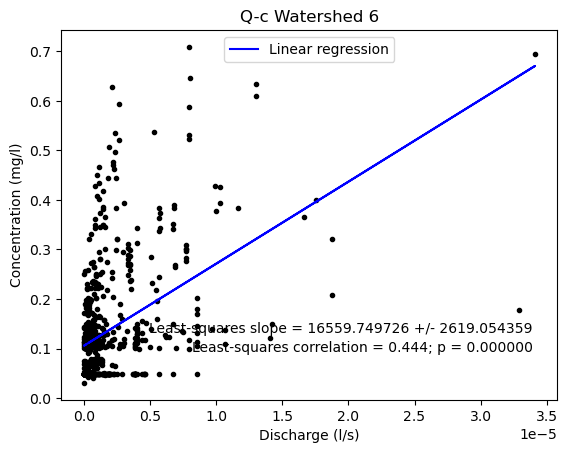

In [43]:
#Plot Q-c scatterplot graph with TDN concentrations with line of best fit and correlation for the data.

#Plot
regressplot(data['Discharge'],data['TDN'],'Concentration (mg/l)', 'Discharge (l/s)', 'Q-c Watershed 6')

The plot shows a positive linear relationship with not too large of a correlation. 

Plot Time plot of daily precipitation and nutrient fluxes

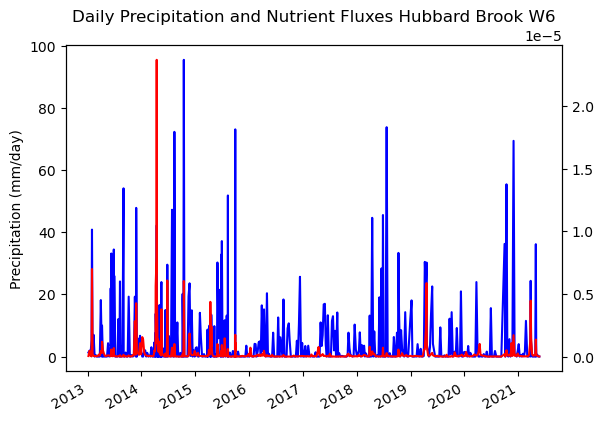

In [45]:
#Plot Time plot of daily precipitation and nutrient fluxes

#Create plot
fig, ax1 = plt.subplots()

ax2 = ax1.twinx() 

# Plot daily precipitation
ax1.plot(data['Precip'],  'b-')

#Plot Nurient Fluxes
ax2.plot(data['flux'], 'r-')

# Add plot components 
ax1.set_ylabel('Precipitation (mm/day)')          
ax1.set_title('Daily Precipitation and Nutrient Fluxes Hubbard Brook W6') 
  
# command to make x-tick labels diagonal to avoid overlap
fig.autofmt_xdate() 

It seems as if high fluxes can occur sometimes along with high precipitation. However, sometimes flux is not associated with precipitation and high precipitation is not necessarily associated with high flux.

Remove months affected by snowmelt and plot precipitation amount versus TDN nutrient flux scatterplot with line of best fit and correlation


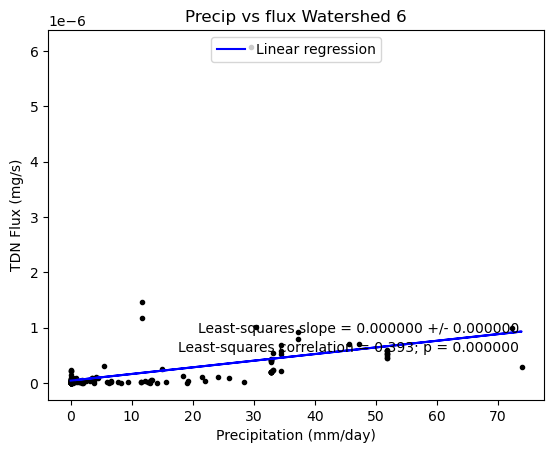

               TDN watershed  Precip  WS  Streamflow  Flag     Discharge  \
2013-06-03  0.0495        W6     0.9   6       3.862  0.00  1.674853e-06   
2013-06-06  0.0495        W6     1.5   6       1.033  0.00  4.479862e-07   
2013-06-07  0.0495        W6    22.0   6       1.985  0.01  8.608448e-07   
2013-06-08  0.0495        W6     3.5   6       4.487  0.00  1.945900e-06   
2013-06-08  0.0495        W6     3.5   6       4.487  0.00  1.945900e-06   
...            ...       ...     ...  ..         ...   ...           ...   
2020-07-20  0.1017        W6     0.0   6       0.201  0.01  8.716867e-08   
2020-07-27  0.1130        W6     1.8   6       0.036  0.03  1.561230e-08   
2020-08-05  0.0618        W6     0.0   6       0.438  0.00  1.899496e-07   
2020-08-10  0.0305        W6     0.0   6       0.014  0.42  6.071449e-09   
2020-08-31  0.1059        W6     0.0   6       0.023  0.00  9.974524e-09   

                    flux  month  
2013-06-03  8.290521e-08      6  
2013-06-06  2.21753

In [50]:
#Remove months affected by snowmelt and plot precipitation amount versus TDN nutrient flux scatterplot with line of best fit and correlation

#Create Month Column
data['month'] = data.index.month

#Remove dates that could be affected by snowmelt
data = data[(data['month'] > 4) & (data['month'] < 10)]

#plot precipitation amount versus TDN
regressplot(data['Precip'],data['flux'],'TDN Flux (mg/s)', 'Precipitation (mm/day)', 'Precip vs flux Watershed 6')



There is a slight positive relationship between precipitation and TDN flux. There is not a strong correlation between the two variables.

## Discussion/Conclusion

The Q-C might match with previous research of this topic. If nutrient flux increases with increasing precipitation it might mean that nutrients get into runoff from the land that flows into river. If nutrient flux decrease with precipitation then this might mean precipitation dilutes the concentration of total dissolved nitrogen in the watershed. This information could be useful for understanding possible causes of higher nutrient fluxes and if they occur in dry or wet conditions.  